In [14]:
from sklearn.datasets import load_iris #load iris data (flower)
from sklearn.model_selection import train_test_split #splits the data into training and testing parts
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text #the main classifier used here and [export_text] shows the if-else like statement
from sklearn.metrics import accuracy_score #tells us how accurate is our model
import matplotlib.pyplot as plt 
import pandas as pd

In [16]:
data = load_iris()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [18]:
#Train decision tree with gini
tree_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
tree_gini.fit(x_train, y_train)
y_predgini = tree_gini.predict(x_test)
print("\nGINI - Accuracy:", accuracy_score(y_test, y_predgini))


GINI - Accuracy: 1.0


In [19]:
#print the tree structure with export_text
print("\nGINI decision tree: ")
print(export_text(tree_gini, feature_names= iris.feature_names))


GINI decision tree: 
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



In [20]:
#Train decision tree with entropy
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth =3 ,random_state=42)
tree_entropy.fit(x_train, y_train)
y_predentropy = tree_entropy.predict(x_test)
print("\nEntropy - Accuracy:", accuracy_score(y_test, y_predentropy))


Entropy - Accuracy: 0.9777777777777777


In [21]:
#print the tree structure with export_text 
print("\nEntropy decision tree:")
print(export_text(tree_entropy, feature_names = iris.feature_names))


Entropy decision tree:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.15
|   |   |   |--- class: 2



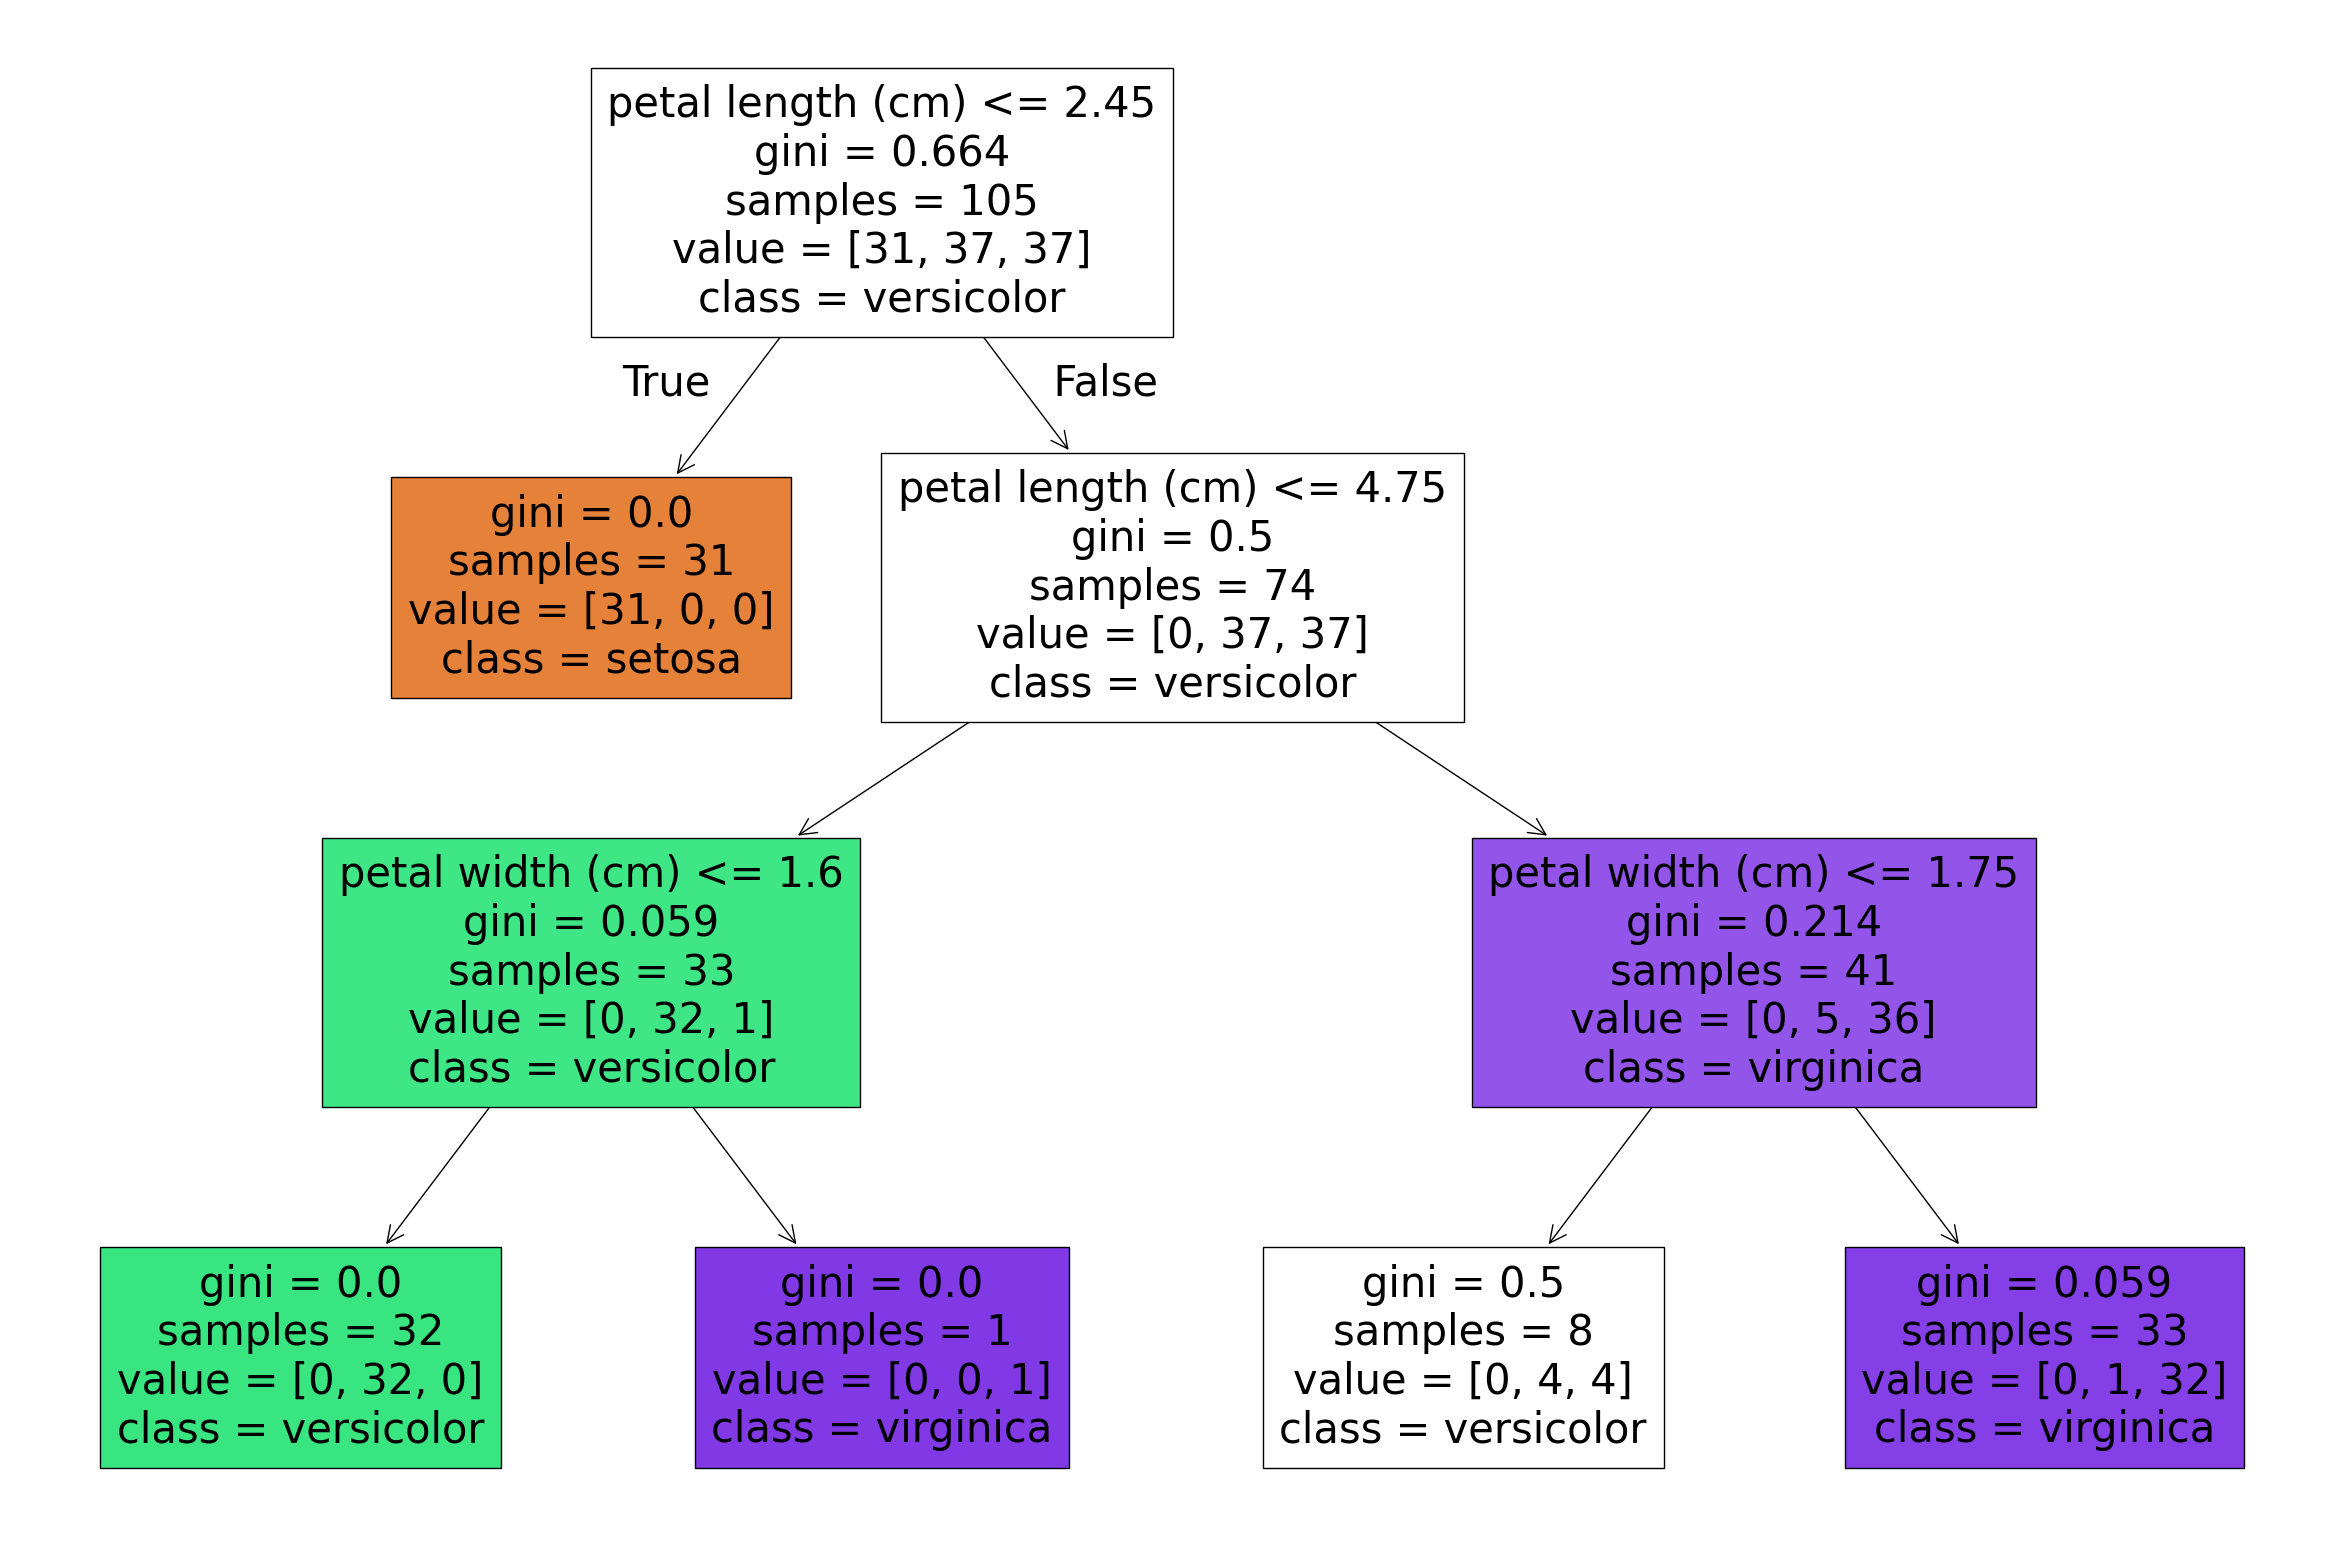

In [24]:
plt.figure(figsize=(30,20))
plot_tree(tree_gini, feature_names = x.columns, class_names = data.target_names, filled=True)
plt.show()